In [ ]:
!pip install geopandas
import geopandas

In [ ]:
!pip install contextily
import contextily as ctx

In [4]:
corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione.zip")
corsi_acqua

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."
2,215,IT03N0080447LO,naturale,Lombardia,Lambro (Fiume),Lambro (Asta),06SS4N,sì,sì,sì,no,sì,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,21811.145089,"MULTILINESTRING ((536963.747 5005395.412, 5369..."
3,252,IT03N008044003021LO,naturale,Lombardia,Garbogera (Torrente),Lambro (Asta),06IN7N,sì,no,sì,sì,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,19767.119220,"LINESTRING (509280.513 5047845.024, 509281.795..."
4,255,IT03N0080440441LO,naturale,Lombardia,Sillaro Salerano,Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,13180.757122,"LINESTRING (528977.056 5024109.798, 528981.181..."
5,256,IT03N0080440701LO,naturale,Lombardia,Addetta (Colatore),Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,9403.459186,"MULTILINESTRING ((530299.337 5029522.740, 5302..."
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
7,65,ITIRN0080984IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,38206.257375,"MULTILINESTRING ((483579.882 5034726.498, 4835..."
8,66,ITIRN0080982IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,sì,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,35927.352062,"MULTILINESTRING ((477067.969 5044605.066, 4770..."
9,67,ITIRN0080983IR,naturale,Lombardia_Piemonte,Ticino (Fiume),Ticino Sub Lacuale,06GL2N,sì,sì,sì,sì,sì,no,no,sì,no,sì,TICINO,no,no,buono,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,mantenimento dello stato buono,Nessuna proroga o deroga,17917.785813,"MULTILINESTRING ((477477.600 5043097.081, 4774..."


1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

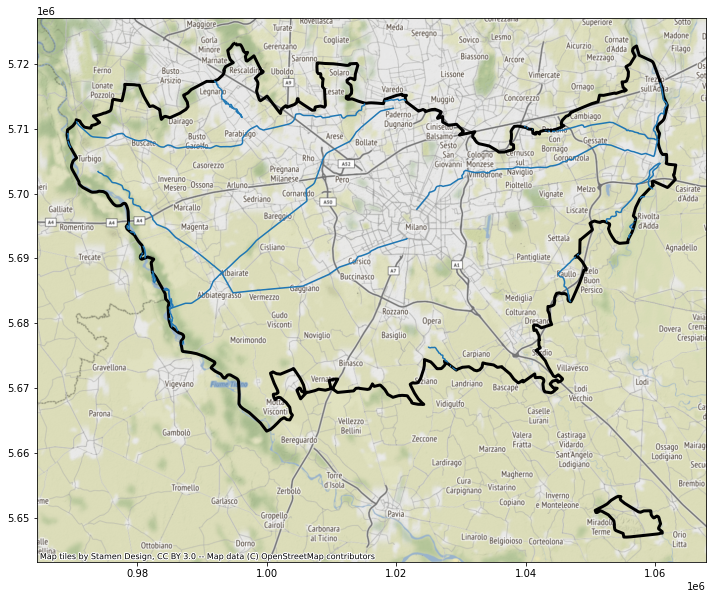

In [5]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
milano = province[province.DEN_UTS == "Milano"]

corsi_milano = corsi_acqua[corsi_acqua.intersects(milano.unary_union)]
dieci_corsi = corsi_milano.sort_values(by = "SHAPE_LEN", ascending = False).head(10)

ax = milano.to_crs(epsg=3857).plot(figsize=(20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
dieci_corsi.to_crs(epsg=3857).plot(ax = ax)
ctx.add_basemap(ax)

2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

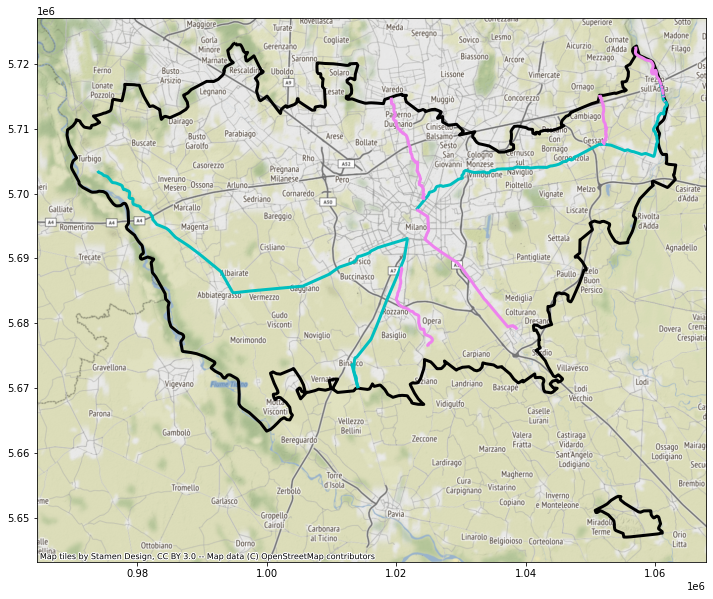

In [6]:
navigli = corsi_milano[corsi_milano.NOME.str.contains("Navigli")]
fiumi_navigli = corsi_acqua[corsi_acqua.touches(navigli.unary_union)]
fiumi_navigli

ax = milano.to_crs(epsg=3857).plot(figsize=(20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
navigli.to_crs(epsg=3857).plot(ax = ax, edgecolor = "c", linewidth = 3)
fiumi_navigli.to_crs(epsg=3857).plot(ax = ax, edgecolor = "violet", linewidth = 3)
ctx.add_basemap(ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

Inserisci il nome del comune: Bresso


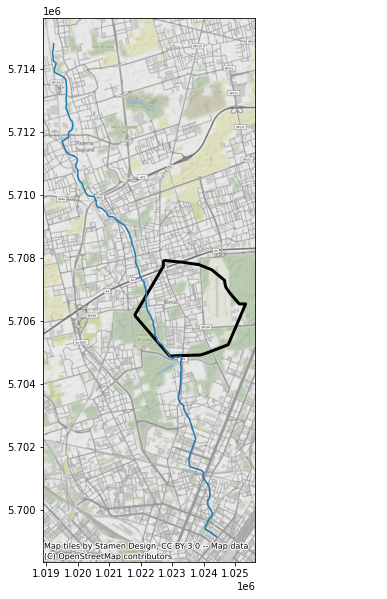

In [7]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
comune = input("Inserisci il nome del comune: ")
lst = list(comuni.COMUNE)

if comune not in lst:
  print("Comune inesistente")
else:
  mappa_comune = comuni[comuni.COMUNE == comune]
  corsi_user = corsi_acqua[corsi_acqua.intersects(mappa_comune.unary_union)]
  ax = mappa_comune.to_crs(epsg=3857).plot(figsize = (20,10), edgecolor = "k", linewidth = 3, facecolor = "none")
  corsi_user.to_crs(epsg=3857).plot(ax = ax)
  ctx.add_basemap(ax)

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

Inserisci il nome del fiume: Lambro (Fiume)


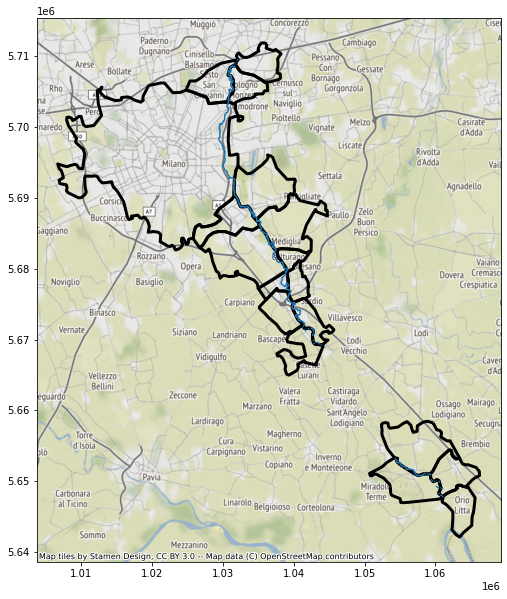

In [8]:
fiume = input("Inserisci il nome del fiume: ")
lst = list(corsi_acqua.NOME)
if fiume not in lst:
  print("Fiume inesistente")
else:
  mappa_fiume = corsi_acqua[corsi_acqua.NOME == fiume]
  comuni_user = comuni[comuni.intersects(mappa_fiume.unary_union)]
  ax = comuni_user.to_crs(epsg=3857).plot(figsize = (20,10), edgecolor = "k", linewidth = 3, facecolor = "none")
  mappa_fiume.to_crs(epsg=3857).plot(ax = ax)
  ctx.add_basemap(ax)

5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [20]:
numero_corsi_milano = corsi_milano.count()["NOME"]
lunghezza_corsi = corsi_milano["SHAPE_LEN"].sum()
print("Il numero totale dei corsi d'acqua di Milano è:", numero_corsi_milano)
print("La lunghezza totale dei corsi d'acqua di Milano è:", lunghezza_corsi)

Il numero totale dei corsi d'acqua di Milano è: 45
La lunghezza totale dei corsi d'acqua di Milano è: 1083787.6793008223


6. visualizzi su unamappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

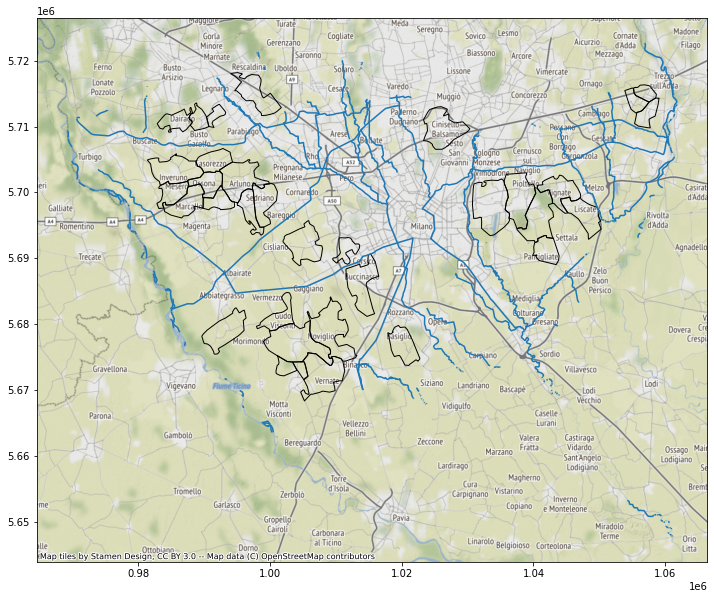

In [27]:
comuni_milano = comuni[comuni.within(milano.unary_union)]
comuni_attraversati = comuni_milano[comuni_milano.intersects(corsi_milano.unary_union)]
comuni_non_attraversati = comuni_milano.drop(comuni_attraversati.index)

ax = comuni_non_attraversati.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k")
corsi_milano.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)